In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, cross_val_score, train_test_split

In [3]:
# 导入数据
def load_data():
    df_abbr = pd.read_csv('happiness_train_abbr.csv')
    df_abbr_test = pd.read_csv('happiness_test_abbr.csv')
    
    return df_abbr, df_abbr_test

# 异常值处理
def handing(df):
    df['work_status'].fillna(9.0, inplace=True)
    
    df['work_yr'][(df['work_exper']==1) & (df['work_yr'].isna())] = 2015 - df['birth'] - 18
    df['work_yr'].fillna(0, inplace=True)
    
    exper_type = {2:1, 3:1, 4:2, 5:2, 6:2}
    df['work_type'].fillna(df['work_exper'].map(exper_type), inplace=True)
    df['work_type'].fillna(1, inplace=True)
    
    df['work_manage'].fillna(4, inplace=True)
    
    return df    
    
# 处理其他异常值，比如-8    
def handing_single(df):
    for c in df.columns:
        if -8 in set(df[c]):
            df[c][df[c]==-8] = df[c].median()        
    return df


def other_handing(df):
    df['income'][df['income'] < 0] = df['income'].median()
    df['family_income'][df['family_income'] < 0] = df['family_income'].median()
    df['family_m'][df['family_m'] < 0] = df['family_m'].median()
    df['house'][df['house'] < 0] = df['house'].median()
    df['work_yr'][df['work_yr'] < 0] = df['work_yr'].median()

    df['family_income'].fillna(df['family_income'].median(), inplace=True)
    
    return df

def norm_decom(df):
    train_y = df.pop('happiness')
    train_X = df
    train_X.pop('survey_time')
    train_X.pop('id')
    
    norm = Normalizer()
    train_X = norm.fit_transform(train_X)

    pca = PCA(n_components='mle', svd_solver='full', random_state=0)
    train_X = pca.fit_transform(train_X)
    
    return train_X, train_y

def out_put(df):
    df = handing(df)
    df = handing_single(df)
    df = other_handing(df)
    train_X, train_y = norm_decom(df)
    
    return train_X, train_y

In [ ]:
df_abbr, df_abbr_test = load_data()
df_abbr = handing(df_abbr)
df_abbr = handing_single(df_abbr)
df_abbr = other_handing(df_abbr)
df_abbr_test = handing(df_abbr_test)
df_abbr_test = handing_single(df_abbr_test)
df_abbr_test = other_handing(df_abbr_test)
train_y = np.array(df_abbr.pop('happiness'))
train_X = df_abbr
train_X.pop('survey_time')
train_X.pop('id')
    
norm = Normalizer()
train_X = norm.fit_transform(train_X)

#pca = PCA(n_components='mle', svd_solver='full', random_state=0)
#train_X = pca.fit_transform(train_X)

test_X = df_abbr_test
test_X.pop('survey_time')
test_X.pop('id')
test_X = norm.fit_transform(test_X)

#test_X = pca.fit_transform(test_X)

In [4]:
train_X.shape, train_y.shape, test_X.shape

((8000, 39), (8000,), (2968, 39))

In [83]:
test_X.shape

(2968, 39)

In [ ]:
df_abbr, df_abbr_test = load_data()
df_abbr = handing(df_abbr)
df_abbr = handing_single(df_abbr)
df_abbr = other_handing(df_abbr)
df_abbr_test = handing(df_abbr_test)
df_abbr_test = handing_single(df_abbr_test)
df_abbr_test = other_handing(df_abbr_test)
train_y = df_abbr.pop('happiness')
train_X = df_abbr
train_X.pop('survey_time')
train_X.pop('id')
test_X = df_abbr_test.pop('survey_time')
test_X = df_abbr_test.pop('id')

In [2]:
ls

happiness_index.xlsx           happiness_test_complete.csv
happiness_submit.csv           happiness_train_abbr.csv
happiness_survey_cgss2015.pdf  happiness_train_complete.csv
happiness_test_abbr.csv        main.ipynb


In [3]:
df_index = pd.read_excel('happiness_index.xlsx')

In [1]:
df_comp = pd.read_csv('happiness_train_complete.csv', engine='python')

NameError: name 'pd' is not defined

In [198]:
df_comp_test = pd.read_csv('happiness_test_complete.csv', engine='python')

In [4]:
df_abbr = pd.read_csv('happiness_train_abbr.csv', engine='python')

In [5]:
df_abbr_test = pd.read_csv('happiness_test_abbr.csv', engine='python')

In [103]:
df_abbr.shape, df_abbr_test.shape

((8000, 42), (2968, 41))

In [7]:
df_index[df_index['变量名'].str.startswith('work')]

,变量名,原始问卷编号,问题,取值含义,精简版
67,work_exper,a58,您的工作经历及状况,1 = 目前从事非农工作; 2 = 目前务农，曾经有过非农工作; 3 = 目前务农，没有过非...,Y
68,work_status,a59a,下列各种情形，哪一种更符合您目前工作的状况,1 = 自己是老板（或者是合伙人）; 2 = 个体工商户; 3 = 受雇于他人（有固定雇主）...,Y
69,work_yr,a59c,从您第一份非农工作到目前的工作，您一共工作了多少年,-,Y
70,work_type,a59e,您目前工作的性质,1 = 全职工作; 2 = 非全职工作;,Y
71,work_manage,a59f,您目前工作的管理活动情况,1 = 只管理别人，不受别人管理; 2 = 既管理别人，又受别人管理; 3 = 只受别人管理...,Y


## 查看数据空值

In [8]:
df_abbr.isna().sum()[df_abbr.isna().sum()>1]

work_status    5049
work_yr        5049
work_type      5049
work_manage    5049
dtype: int64

In [9]:
df_index['取值含义'][df_index['变量名']=='work_exper'].values

array(['1 = 目前从事非农工作; 2 = 目前务农，曾经有过非农工作; 3 = 目前务农，没有过非农工作; 4 = 目前没有工作，而且只务过农; 5 = 目前没有工作，曾经有过非农工作; 6 = 从未工作过; '],
      dtype=object)

In [10]:
df_abbr['work_exper'].value_counts(dropna=False).index

Int64Index([1, 5, 3, 4, 2, 6], dtype='int64')

### work_status 数据预处理

In [11]:
df_index['取值含义'][df_index['变量名']=='work_status'].values

array(['1 = 自己是老板（或者是合伙人）; 2 = 个体工商户; 3 = 受雇于他人（有固定雇主）; 4 = 劳务工/劳务派遣人员; 5 = 零工、散工（无固定雇主的受雇者）; 6 = 在自己家的生意/企业中工作/帮忙，领工资; 7 = 在自己家的生意/企业中工作/帮忙，不领工资; 8 = 自由职业者; 9 = 其他; '],
      dtype=object)

In [12]:
df_abbr['work_status'].value_counts(dropna=False).index

Float64Index([nan, 3.0, 2.0, 5.0, 1.0, 4.0, 8.0, 6.0, 9.0, -8.0, 7.0], dtype='float64')

In [13]:
df_index['取值含义'][df_index['变量名']=='work_exper'].values

array(['1 = 目前从事非农工作; 2 = 目前务农，曾经有过非农工作; 3 = 目前务农，没有过非农工作; 4 = 目前没有工作，而且只务过农; 5 = 目前没有工作，曾经有过非农工作; 6 = 从未工作过; '],
      dtype=object)

In [14]:
# work_exper 工作经历及状况 与 work_status映射关系
pd.Series(zip(df_abbr['work_exper'], df_abbr['work_status'])).value_counts(dropna=False).head(15)

(1, 3.0)     1767
(1, 2.0)      471
(1, 5.0)      285
(1, 1.0)      136
(1, 4.0)       88
(1, 8.0)       83
(1, 6.0)       45
(1, 9.0)       32
(1, -8.0)      25
(1, 7.0)       19
(5, nan)        1
(4, nan)        1
(5, nan)        1
(4, nan)        1
(5, nan)        1
dtype: int64

In [15]:
exper_status = {2:9.0, 3:9.0, 4:9.0, 5:9.0, 6:9.0}

In [16]:
df_abbr['work_status'].fillna(9.0, inplace=True)

### work_yr 数据预处理

In [17]:
df_index['取值含义'][df_index['变量名']=='work_yr'].values

array(['-'], dtype=object)

In [18]:
df_abbr['work_yr'].value_counts(dropna=False).index

Float64Index([ nan, 20.0, 10.0,  1.0,  5.0, 15.0, 30.0,  3.0,  4.0, 25.0,  2.0,
               8.0,  6.0,  7.0, -2.0, 12.0, -1.0, 13.0, 11.0, 16.0,  9.0, 18.0,
              23.0, 14.0, 27.0, 35.0, 40.0, 26.0, 22.0, 28.0, 24.0, 21.0, 19.0,
              33.0, 31.0, 32.0, 17.0, 34.0, 29.0, 36.0, 37.0, 38.0, -3.0, 42.0,
              43.0, 39.0, 50.0, 45.0,  0.0, 46.0, 41.0, 52.0, 44.0, 47.0, 48.0,
              55.0, 49.0],
             dtype='float64')

In [19]:
df_abbr['work_exper'][df_abbr['work_yr'].isna()].value_counts()

5    1968
3    1242
4    1065
2     387
6     380
1       7
Name: work_exper, dtype: int64

In [20]:
exper_yr = {1:"2015-birth", 2:0.0, 3:0.0, 4:0.0, 5:0.0, 6:0.0}

In [21]:
# work_exper 工作经历及状况 与 work_yr映射关系
pd.Series(zip(df_abbr['work_exper'], df_abbr['work_yr'])).value_counts(dropna=False).tail()

(5, nan)    1
(5, nan)    1
(3, nan)    1
(3, nan)    1
(6, nan)    1
dtype: int64

In [22]:
df_abbr['work_yr'][(df_abbr['work_exper']==1) & (df_abbr['work_yr'].isna())] = 2015 - df_abbr['birth'] - 18

/home/dkj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_abbr['work_yr'].fillna(0, inplace=True)

In [24]:
pd.Series(2015 - df_abbr['birth'] - 18).value_counts().index

Int64Index([32, 34, 29, 27, 42, 33, 28, 30, 40, 22, 44, 31, 43, 24, 45, 47, 48,
            35, 39, 41, 25, 37, 46, 52,  7, 49, 23, 26, 19, 12, 15, 17, 50, 21,
            20, 10, 11, 38,  9, 18,  8, 36, 51, 53, 16,  4,  5, 13,  6, 14, 55,
             3, 57, 56, 54,  0,  2, 60, 59,  1, 58, 62, 61, 64, 63, 67, 65, 66,
            69, 68, 70, 71, 72, 75, 73, 76, 74],
           dtype='int64')

### work_type 数据预处理

In [25]:
df_index['取值含义'][df_index['变量名']=='work_type'].values

array(['1 = 全职工作; 2 = 非全职工作; '], dtype=object)

In [26]:
df_abbr['work_type'].value_counts(dropna=False).index

Float64Index([nan, 1.0, 2.0, -8.0], dtype='float64')

In [27]:
df_index['取值含义'][df_index['变量名']=='work_exper'].values

array(['1 = 目前从事非农工作; 2 = 目前务农，曾经有过非农工作; 3 = 目前务农，没有过非农工作; 4 = 目前没有工作，而且只务过农; 5 = 目前没有工作，曾经有过非农工作; 6 = 从未工作过; '],
      dtype=object)

In [28]:
# work_exper 工作经历及状况 与 work_type映射关系
pd.Series(zip(df_abbr['work_exper'], df_abbr['work_type'])).value_counts(dropna=False).head(15)

(1, 1.0)     2546
(1, 2.0)      337
(1, -8.0)      68
(2, nan)        1
(5, nan)        1
(4, nan)        1
(5, nan)        1
(4, nan)        1
(5, nan)        1
(4, nan)        1
(5, nan)        1
(3, nan)        1
(5, nan)        1
(3, nan)        1
(3, nan)        1
dtype: int64

In [29]:
exper_type = {2:1, 3:1, 4:2, 5:2, 6:2}

df_abbr['work_type'].fillna(df_abbr['work_exper'].map(exper_type), inplace=True)

df_abbr['work_type'].fillna(1, inplace=True)

### work_manage 数据预处理

In [31]:
df_index['取值含义'][df_index['变量名']=='work_manage'].values

array(['1 = 只管理别人，不受别人管理; 2 = 既管理别人，又受别人管理; 3 = 只受别人管理，不管理别人; 4 = 既不管理别人，又不受别人管理; '],
      dtype=object)

In [32]:
df_abbr['work_manage'].value_counts(dropna=False).index

Float64Index([nan, 3.0, 4.0, 2.0, 1.0, -8.0], dtype='float64')

In [33]:
df_index['取值含义'][df_index['变量名']=='work_exper'].values

array(['1 = 目前从事非农工作; 2 = 目前务农，曾经有过非农工作; 3 = 目前务农，没有过非农工作; 4 = 目前没有工作，而且只务过农; 5 = 目前没有工作，曾经有过非农工作; 6 = 从未工作过; '],
      dtype=object)

In [34]:
exper_manage = {2:4, 3:4, 4:4, 5:4, 6:4}

In [35]:
# work_exper 工作经历及状况 与 work_type映射关系
pd.Series(zip(df_abbr['work_exper'], df_abbr['work_manage'])).value_counts(dropna=False).head(15)

(1, 3.0)     1554
(1, 4.0)      575
(1, 2.0)      574
(1, 1.0)      189
(1, -8.0)      59
(2, nan)        1
(5, nan)        1
(4, nan)        1
(5, nan)        1
(4, nan)        1
(5, nan)        1
(5, nan)        1
(4, nan)        1
(3, nan)        1
(5, nan)        1
dtype: int64

In [36]:
df_abbr['work_manage'].fillna(4, inplace=True)

### happiness 数据预处理

In [37]:
df_abbr['happiness'].value_counts(dropna=False)

 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64

##### >>> 有12个为-8的异常值，暂用1填充

In [38]:
df_abbr['happiness'][df_abbr['happiness']==-8] = 1

/home/dkj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
# work_exper 工作经历及状况 与 happiness映射关系
pd.Series(zip(df_abbr['work_exper'], df_abbr['happiness'])).value_counts(dropna=False).head(15)

(1, 4)    1849
(5, 4)    1176
(3, 4)     740
(4, 4)     588
(1, 5)     485
(1, 3)     449
(5, 5)     381
(5, 3)     261
(2, 4)     239
(6, 4)     226
(4, 5)     215
(3, 3)     195
(3, 5)     178
(4, 3)     157
(1, 2)     138
dtype: int64

In [48]:
df_abbr.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8000.0,4000.500000,2309.545410,1.0,2000.75,4000.5,6000.25,8000.0
happiness,8000.0,3.863625,0.825598,1.0,4.00,4.0,4.00,5.0
survey_type,8000.0,1.405500,0.491019,1.0,1.00,1.0,2.00,2.0
province,8000.0,15.155375,8.917100,1.0,7.00,15.0,22.00,31.0
city,8000.0,42.564750,27.187404,1.0,18.00,42.0,65.00,89.0
county,8000.0,70.619000,38.747503,1.0,37.00,73.0,104.00,134.0
gender,8000.0,1.530000,0.499130,1.0,1.00,2.0,2.00,2.0
birth,8000.0,1964.707625,16.842865,1921.0,1952.00,1965.0,1977.00,1997.0
nationality,8000.0,1.393750,1.462696,1.0,1.00,1.0,1.00,8.0
religion,8000.0,0.893750,0.308177,0.0,1.00,1.0,1.00,1.0


# 处理其他异常值，比如-8等小于0的值

In [41]:
def hand_other(df):
    for c in df.columns:
        if -8 in set(df[c]):
            df[c][df[c]==-8] = df[c].median()        
    return df        

In [ ]:
df_abbr = hand_other(df_abbr)

In [46]:
df_abbr.describe().T[df_abbr.describe().T['min'] < 0]

,count,mean,std,min,25%,50%,75%,max
income,8000.0,33307.342750,232985.314544,-3.0,1695.0,15000.0,36000.0,9999990.0
work_yr,8000.0,5.374375,9.898445,-3.0,0.0,0.0,7.0,55.0
family_income,7999.0,67760.502438,290959.100823,-3.0,13000.0,38000.0,70000.0,9999992.0
family_m,8000.0,2.882500,1.521835,-3.0,2.0,3.0,4.0,50.0
house,8000.0,1.063625,0.789402,-3.0,1.0,1.0,1.0,30.0


In [ ]:
df_abbr['income'][df_abbr['income'] < 0] = df_abbr['income'].median()
df_abbr['family_income'][df_abbr['family_income'] < 0] = df_abbr['family_income'].median()
df_abbr['family_m'][df_abbr['family_m'] < 0] = df_abbr['family_m'].median()
df_abbr['house'][df_abbr['house'] < 0] = df_abbr['house'].median()
df_abbr['work_yr'][df_abbr['work_yr'] < 0] = df_abbr['work_yr'].median()

df_abbr['family_income'].fillna(df_abbr['family_income'].median(), inplace=True)

In [53]:
df_abbr_copy = df_abbr.copy(deep=True)

In [55]:
train_y = df_abbr_copy.pop('happiness')

In [57]:
train_X = df_abbr_copy

## 正则化 / 标准化

In [106]:
from sklearn.preprocessing import Normalizer

In [107]:
norm = Normalizer()
train_X = norm.fit_transform(train_X)

## 降维

In [79]:
train_X.columns

Index(['id', 'survey_type', 'province', 'city', 'county', 'gender', 'birth',
       'nationality', 'religion', 'religion_freq', 'edu', 'income',
       'political', 'floor_area', 'height_cm', 'weight_jin', 'health',
       'health_problem', 'depression', 'hukou', 'socialize', 'relax', 'learn',
       'equity', 'class', 'work_exper', 'work_status', 'work_yr', 'work_type',
       'work_manage', 'family_income', 'family_m', 'family_status', 'house',
       'car', 'marital', 'status_peer', 'status_3_before', 'view',
       'inc_ability'],
      dtype='object')

In [ ]:
train_X.pop('survey_time')

train_X.pop('id')

from sklearn.decomposition import PCA

pca = PCA(n_components='mle', svd_solver='full', random_state=0)

train_X = pca.fit_transform(train_X)

## 模型建立

In [61]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

In [63]:
# 交叉验证
from sklearn.model_selection import StratifiedKFold, cross_validate

In [611]:
# 创建随机森林模型
#model = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=1, 
#                             min_samples_split=18, min_samples_leaf=10, max_features=5, random_state=0)
#
model = RandomForestClassifier(n_estimators=4, random_state=0, min_weight_fraction_leaf=0.0001, bootstrap=True, )
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

cv_results = cross_validate(estimator=model, X=train_X, y=train_y, cv=skf, scoring=('accuracy'), return_train_score=True)
print(cv_results)
model.fit(train_X, train_y)

{'fit_time': array([0.06395984, 0.06595802, 0.05296588, 0.0439744 , 0.04697084,
       0.05196953, 0.04497194, 0.04697061, 0.04896903, 0.04896927]), 'score_time': array([0.00399899, 0.00199962, 0.00199842, 0.00099969, 0.00299668,
       0.00199914, 0.00199866, 0.00199914, 0.0019989 , 0.00099945]), 'test_score': array([0.44278607, 0.45605307, 0.41528239, 0.45590682, 0.43094842,
       0.42928453, 0.465     , 0.45409015, 0.44240401, 0.42976589]), 'train_score': array([0.88064397, 0.88490007, 0.88214616, 0.87439882, 0.87754347,
       0.87828339, 0.87349732, 0.8783284 , 0.8766642 , 0.88352745])}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0001, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [612]:
labels = model.predict(test_X)
pd.Series(labels).value_counts()

3    1467
1     590
4     441
2     361
0     109
dtype: int64

In [568]:
pd.Series(train_y).value_counts()

3    3699
4    1056
2     842
1     343
0      67
dtype: int64

In [607]:
df_abbr_test['predict'] = pd.Series(labels).map({0:1, 1:2, 2:3, 3:4, 4:5})

In [608]:
df_abbr_test['predict'].to_csv('d:\dump\happiness_predict.csv')

C:\Users\Dengkj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=0)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=0)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(train_X, train_y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

#plt.figure(figsize=(10, 8))
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [141]:
df_abbr_test['happiness2'] = model.predict(test_X)

In [142]:
df_abbr_test.to_csv('predict2.csv')

## 采用神经网络模型

In [54]:
from tensorflow.keras import Sequential, layers, models, regularizers

In [380]:
def model_d(input_dim=36, l2=0.01, l1=0.01, output=5):
    model = Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim, 
                           kernel_regularizer=regularizers.l2(l2), 
                           activity_regularizer=regularizers.l1(l1)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu', 
                           kernel_regularizer=regularizers.l2(l2), 
                           activity_regularizer=regularizers.l1(l1)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu', 
                           kernel_regularizer=regularizers.l2(l2), 
                           activity_regularizer=regularizers.l1(l1)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu', 
                           kernel_regularizer=regularizers.l2(l2), 
                           activity_regularizer=regularizers.l1(l1)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(5, activation='softmax'))
    
    return model

In [381]:
model = model_d(input_dim=36, l2=0.001, l1=0.001, output=5)

Train on 4204 samples, validate on 1803 samples
Epoch 1/15
4204/4204 [==============================] - 1s 211us/sample - loss: 1.9743 - accuracy: 0.6192 - val_loss: 1.5967 - val_accuracy: 0.6079
Epoch 2/15
4204/4204 [==============================] - 0s 88us/sample - loss: 1.4617 - accuracy: 0.6192 - val_loss: 1.3614 - val_accuracy: 0.6079
Epoch 3/15
4204/4204 [==============================] - 0s 83us/sample - loss: 1.1925 - accuracy: 0.6192 - val_loss: 1.2136 - val_accuracy: 0.6079
Epoch 4/15
4204/4204 [==============================] - 0s 83us/sample - loss: 1.1332 - accuracy: 0.6192 - val_loss: 1.1429 - val_accuracy: 0.6079
Epoch 5/15
4204/4204 [==============================] - 0s 84us/sample - loss: 1.1060 - accuracy: 0.6192 - val_loss: 1.1412 - val_accuracy: 0.6079
Epoch 6/15
4204/4204 [==============================] - 0s 85us/sample - loss: 1.1022 - accuracy: 0.6192 - val_loss: 1.1400 - val_accuracy: 0.6079
Epoch 7/15
4204/4204 [==============================] - 0s 84us/sampl

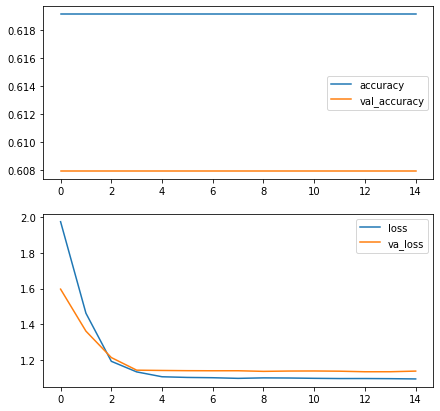

In [385]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_X, train_y, batch_size=100, epochs=15, validation_split=0.3)


plt.figure(figsize=(7, 7))

plt.subplot(2, 1, 1)
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy','loss','va_loss'])

plt.subplot(2, 1, 2)
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

plt.legend(['loss','va_loss'])

In [386]:
pd.Series(model.predict_classes(test_X)).value_counts()

3    2968
dtype: int64

In [65]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)

In [126]:
labels = model.predict_classes(train_X)
pd.Series(labels).value_counts()

0    8000
dtype: int64

## 重构随机森林

In [21]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, train_X, train_y, cv=10).mean()
score_pre

0.601623907145555

In [ ]:
model = RandomForestClassifier(n_estimators=15, random_state=0)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

cv_results = cross_validate(estimator=model, X=train_X, y=train_y, cv=skf, scoring=('accuracy'), return_train_score=True)
cv_results

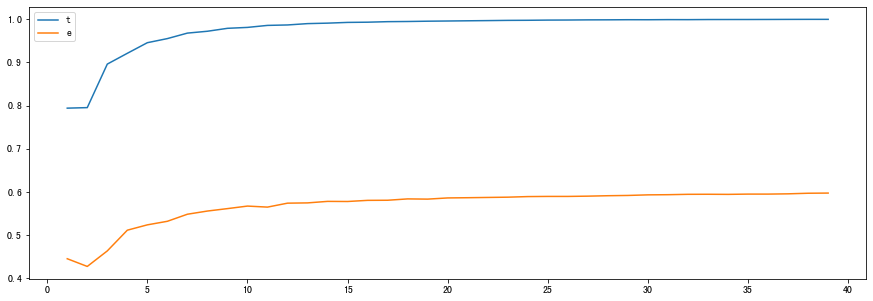

In [110]:
train_scores = []
test_scores = []
for e in range(1, 40, 1):
    rfc = RandomForestClassifier(n_estimators = e, random_state=0)
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_validate(estimator=rfc, X=train_X, y=train_y, cv=skf, scoring=('accuracy'), return_train_score=True)
    
    train_scores.append(cv_results['train_score'].mean())
    test_scores.append(cv_results['test_score'].mean())
    
#print(max(scores), (scores.index(max(scores))*10+1))
plt.figure(figsize=[15, 5])
plt.plot(range(1, 40, 1), train_scores)
plt.legend('train_scores')
plt.plot(range(1, 40, 1), test_scores)
plt.legend('test_scores')
plt.show()

0.598499843083049 30


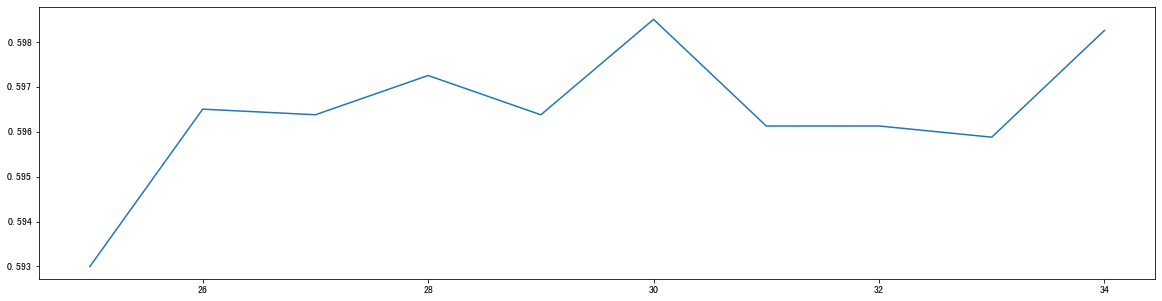

In [106]:
scores = []
for e in range(25,35):
    rfc = RandomForestClassifier(n_estimators = e+1, random_state=0)
    score = cross_val_score(rfc, train_X, train_y, cv=10).mean()
    scores.append(score)
    
print(max(scores), ([*range(25, 35)][scores.index(max(scores))]))
plt.figure(figsize=[20, 5])
plt.plot(range(25, 35), scores)
plt.show()

0.598499843083049 30


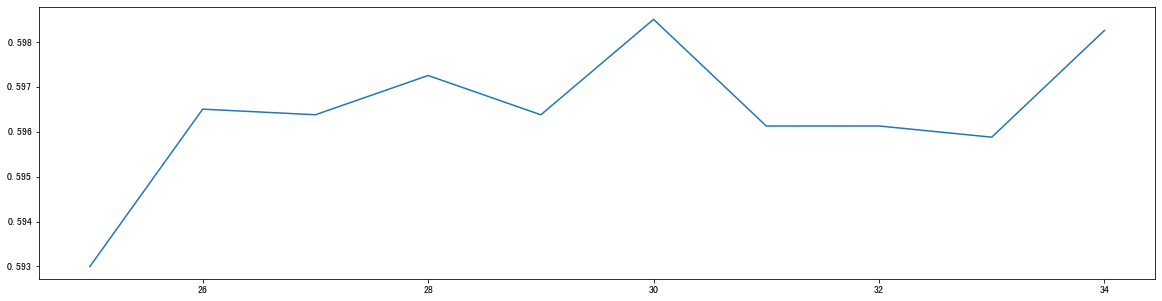

In [23]:
print(max(scores), ([*range(25, 35)][scores.index(max(scores))]))
plt.figure(figsize=[20, 5])
plt.plot(range(25, 35), scores)
plt.show()

In [25]:
param_grid = {'max_depth' : np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=30, random_state=0)
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(train_X, train_y)
GS.best_params_

{'max_depth': 1}

In [26]:
GS.best_score_

0.60375

In [27]:
param_grid = {'max_features' : np.arange(5, 30, 1)}
rfc = RandomForestClassifier(n_estimators=30, random_state=0)
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(train_X, train_y)
GS.best_params_

{'max_features': 5}

In [28]:
param_grid = {'min_samples_leaf' : np.arange(1, 1+10, 1)}
rfc = RandomForestClassifier(n_estimators=30, random_state=0)
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(train_X, train_y)
GS.best_params_

{'min_samples_leaf': 10}

In [29]:
param_grid = {'min_samples_split' : np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=30, random_state=0)
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(train_X, train_y)
GS.best_params_

{'min_samples_split': 18}

In [30]:
param_grid = {'criterion' : ['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=30, random_state=0)
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(train_X, train_y)
GS.best_params_

{'criterion': 'entropy'}

In [32]:
rfc = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=1, 
                             min_samples_split=18, min_samples_leaf=10, max_features=5, random_state=0)
score_pre = cross_val_score(rfc, train_X, train_y, cv=10).mean()
score_pre

0.603750944070143

In [46]:
import seaborn as sns

In [55]:
df_abbr.columns

Index(['id', 'happiness', 'survey_type', 'province', 'city', 'county',
       'survey_time', 'gender', 'birth', 'nationality', 'religion',
       'religion_freq', 'edu', 'income', 'political', 'floor_area',
       'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
       'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'work_exper',
       'work_status', 'work_yr', 'work_type', 'work_manage', 'family_income',
       'family_m', 'family_status', 'house', 'car', 'marital', 'status_peer',
       'status_3_before', 'view', 'inc_ability'],
      dtype='object')

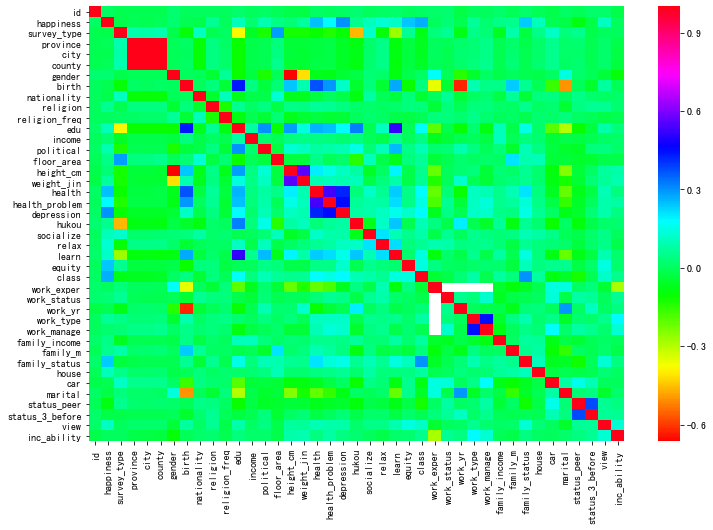

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df_abbr.corr(), cmap=plt.cm.hsv)

In [114]:
df_abbr.shape

(6007, 36)

In [460]:
test_X = df_abbr_test[df_abbr.columns].copy()

In [461]:
test_X = np.array(test_X)

In [7]:
df_abbr.dropna(subset=['family_income'], inplace=True)

In [17]:
df_abbr.dropna(axis=1, inplace=True)

In [25]:
df_abbr.dropna(inplace=True)

In [24]:
df_abbr[df_abbr<0] = np.nan

In [27]:
train_y = df_abbr.pop('happiness')

In [32]:
train_y = train_y.map({1:0, 2:1, 3:2, 4:3, 5:4})

In [33]:
train_y = np.array(train_y)

In [462]:
train_X = df_abbr.copy()

In [287]:
norm = Normalizer()

In [463]:
train_X = norm.fit_transform(train_X)

In [464]:
pca = PCA(n_components=4, tol=0.01)

In [465]:
train_X = pca.fit_transform(train_X)

In [466]:
test_X = norm.fit_transform(test_X)

In [467]:
test_X = pca.fit_transform(test_X)

## SVM模型

In [274]:
from sklearn.svm import SVC

In [332]:
svc = SVC(C=0.0001, gamma=8.0, tol=0.001, kernel='rbf', coef0=0.0, degree=3, class_weight='balanced')
svc.fit(train_X, train_y)
print(svc.score(train_X, train_y))
pd.Series(svc.predict(test_X)).value_counts()

0.6157815881471617


3    2968
dtype: int64